In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "divvy-trips"

## **CYCLISTIC PROJECT**






## **Business Objective**
The objective of this project is to analyze the usage patterns and behaviors of Cyclistic's annual members and casual riders to identify any differences that can inform the development of targeted marketing strategies. The primary goal is to increase the conversion of casual riders into annual members, in order to maximize the long-term growth and profitability of Cyclistic's bike-share program. Key stakeholders include Cyclistic's management team, finance analysts, annual members, casual riders, and the marketing analyst team. Success will be measured by the percentage of casual riders who convert to annual members, and the effectiveness of the targeted marketing strategies in achieving this goal.    


## **Data Summary**

##### **Location and Organisation of Data**
The data is located on an AWS server that is easily downloadable and named correctly. I downloaded the previous 12 months' data and stored it locally for the next steps in the analysis process.
The data is organized by year and Fiscal Quarters and is stored in CSV files with the File names :
* Divvy_Trips_2019_Q2
* Divvy_Trips_2019_Q3
* Divvy_Trips_2019_Q4
* Divvy_Trips_2020_Q1

Trip_id, start_time, end_time, bikeid, tripduration, from_station_id, from_station_name, to_station_id, to_station_name, usertype, gender, birthyear are the file columns. 
The data is extensive and includes information from all of the rides recorded on the system.

##### **Issues with Bias or Credibility**
There do not appear to be any issues with bias or credibility in the data, as it comes from the company that manages the City of Chicago’s Cyclistic Bike Share program. 
The data is reliable, original, comprehensive, and current. However, the data does have some limitations due to data privacy issues that prohibit the use of personally identifiable information.

##### **Licensing, Privacy, Security, and Accessibility**
The data is made accessible to the public by the City of Chicago, and all identifying information has been removed from the data to protect privacy. The data is stored in CSV files that are updated on a monthly basis, and the license governing the distribution of this data is available at https://ride.divvybikes.com/data-license-agreement.

##### **Verifying Data Integrity**
The data is collected by Motivate, Inc., the corporation that manages the City of Chicago’s Cyclistic Bike Share program and is published on a monthly basis. The user downloaded the data directly from an AWS server, ensuring that the data was not altered during the transfer process. 

##### **Answering the Business Question**
The data helps answer questions related to the usage of the Cyclistic Bike Share program, such as how different types of riders use the program and where the most popular stations are located.

##### **Problems with the DataSet**
There are some discrepancies in the structure of the dataframe, such as duplicate records and missing fields, that can be solved by data cleaning. Additionally, some values are missing from the data, which the user decided to eliminate from the analysis. There are also some limitations due to data privacy issues that prohibit the use of personally identifiable information. Finally, there are some issues with the data, such as inconsistencies in the rideable type field and difficulties in mapping popular stations due to the use of lat/long coordinates.


## **Process and Clean**

**Tools**: I used RStudio Desktop to analyse, clean, perform summarisations and visualisations the data.Considering how versatile RStudio is I considered being the best tool for this project.
Tableau was employed to give very presentable dashboards.

In order to obtain a comprehensive understanding of the field content, data formats, and data integrity, the data was examined. The assessment involved reviewing the 12 original files and inspecting column names, as well as identifying missing values, trailing white spaces, duplicate records, and other data irregularities. This evaluation revealed several abnormalities, including missing values in start and end station variables, as well as missing values in end_lat, end_lgt, start_lat, and start_lgt variables. Additionally, there were duplicate records identified in the ride_ID variable and values that were too long or too short in the ride duration variable.

#### **Load the necessary libraries**

In [2]:
library(tidyverse)
library(skimr)
library(lubridate)
library(janitor)
library(scales)
library(mapview)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




#### **Data Collection**

In [3]:
q1_2020 <- read_csv("../input/divvy-trips/Divvy_Trips_2020_Q1.csv")
q2_2019 <- read_csv("../input/divvy-trips/Divvy_Trips_2019_Q2.csv")
q3_2019 <- read_csv("../input/divvy-trips/Divvy_Trips_2019_Q3.csv")
q4_2019 <- read_csv("../input/divvy-trips/Divvy_Trips_2019_Q4.csv")

Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1108163 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): 03 - Rental Start Station Name, 02 - Rental End Station Name, User...
dbl  (5): 01 - Rental Details Rental ID, 01 - Rental Details Bike ID, 03 - R...
num  (1): 01 - Rental Details Duration In Seconds Uncapped
dttm (2): 01 - Rental Details Local Start Time, 01 - Rental Details Local En...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show

#### **Data Wrangling**

**Compare column names for each file. This is to ensure uniformity so they can easily be joined to form a single dataframe.**

In [4]:
colnames(q1_2020)
colnames(q2_2019)
colnames(q3_2019)
colnames(q4_2019)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

**We decide to rename all other column names to be uniform with that of q1_2020 to ensure uniformity**

In [5]:
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,1072,84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,1458,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,1437,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,1248,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,1550,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,1583,43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NA,NA


ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NA,NA


##### **Inspecting dataframes to ensure uniformity**

In [6]:
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)

spc_tbl_ [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ star

##### **Converting ride_id and rideable_type to character data type so that they can stack correctly**

In [7]:
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

##### **Combining the 4 data sets**

In [8]:
combined_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)


### **In order to understand the data types of the data frame I used glimpse() function**

In [9]:
glimpse(combined_trips)

Rows: 3,879,822
Columns: 19
$ ride_id                                            <chr> "22178529", "221785…
$ started_at                                         <dttm> 2019-04-01 00:02:2…
$ ended_at                                           <dttm> 2019-04-01 00:09:4…
$ rideable_type                                      <chr> "6251", "6226", "56…
$ `01 - Rental Details Duration In Seconds Uncapped` <dbl> 446, 1048, 252, 357…
$ start_station_id                                   <dbl> 81, 317, 283, 26, 2…
$ start_station_name                                 <chr> "Daley Center Plaza…
$ end_station_id                                     <dbl> 56, 59, 174, 133, 1…
$ end_station_name                                   <chr> "Desplaines St & Ki…
$ member_casual                                      <chr> "Subscriber", "Subs…
$ `Member Gender`                                    <chr> "Male", "Female", "…
$ `05 - Member Details Member Birthday Year`         <dbl> 1975, 1984, 1990, 1…
$ tripdurati

#### **Removing empty columns and rows and cleaned variable names**

In [10]:
combined_trips = combined_trips %>% 
  remove_empty(which = c("cols", "rows")) %>% 
  clean_names()

#### **Transforming data types of variables**
**The following variables have been transformed from character to numeric variables**

In [11]:
trips_1 = combined_trips %>% 
  mutate(
    start_lat = as.numeric(start_lat),
    start_lng = as.numeric(start_lng),
    end_lat = as.numeric(end_lat),
    end_lng = as.numeric(end_lng)
  )

glimpse(trips_1)

Rows: 3,879,822
Columns: 19
$ ride_id                                         <chr> "22178529", "22178530"…
$ started_at                                      <dttm> 2019-04-01 00:02:22, …
$ ended_at                                        <dttm> 2019-04-01 00:09:48, …
$ rideable_type                                   <chr> "6251", "6226", "5649"…
$ x01_rental_details_duration_in_seconds_uncapped <dbl> 446, 1048, 252, 357, 1…
$ start_station_id                                <dbl> 81, 317, 283, 26, 202,…
$ start_station_name                              <chr> "Daley Center Plaza", …
$ end_station_id                                  <dbl> 56, 59, 174, 133, 129,…
$ end_station_name                                <chr> "Desplaines St & Kinzi…
$ member_casual                                   <chr> "Subscriber", "Subscri…
$ member_gender                                   <chr> "Male", "Female", "Mal…
$ x05_member_details_member_birthday_year         <dbl> 1975, 1984, 1990, 1993…
$ tripdurati

#### **Evaluate Statistical Data of the data frame**

In [12]:
trips_1 %>% 
  summary()

   ride_id            started_at                     ended_at                  
 Length:3879822     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-23 07:49:09   1st Qu.:2019-06-23 08:20:27  
 Mode  :character   Median :2019-08-14 17:43:38   Median :2019-08-14 18:02:04  
                    Mean   :2019-08-26 00:49:59   Mean   :2019-08-26 01:14:37  
                    3rd Qu.:2019-10-12 12:10:21   3rd Qu.:2019-10-12 12:36:16  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      x01_rental_details_duration_in_seconds_uncapped
 Length:3879822     Min.   :     61                                
 Class :character   1st Qu.:    426                                
 Mode  :character   Median :    742                                
                    Mean   :   1327                                
                    

#### **Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020**

In [13]:
trips_2 <- trips_1 %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "x01_rental_details_duration_in_seconds_uncapped", "x05_member_details_member_birthday_year", "member_gender", "tripduration"))

#### **We need to replace "Subscriber" with "member" and "Customer" with "casual" in the "member_casual" column**

In [14]:
trips_2 <-  trips_2 %>% 
  mutate(member_casual = recode(member_casual
                           ,"Subscriber" = "member"
                           ,"Customer" = "casual"),
        hour_start = hour(started_at),
    weekday = wday(started_at, label = T, abbr = F),
    month = month(started_at, label = T, abbr =F),
    day = day(started_at),
    week = strftime(started_at, format = "%V"))
table(trips_2$member_casual)


 casual  member 
 905954 2973868 

#### **We will now add columns that list the date, month, day, and year of each ride**
**This allows us to aggregate ride data for each month, day, or year**

In [15]:
trips_2$date <- as.Date(trips_2$started_at) #The default format is yyyy-mm-dd
trips_2$month <- format(as.Date(trips_2$date), "%m")
trips_2$day <- format(as.Date(trips_2$date), "%d")
trips_2$year <- format(as.Date(trips_2$date), "%Y")
trips_2$day_of_week <- format(as.Date(trips_2$date), "%A")

#### **We will want to add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. We will add "ride_length" to the entire dataframe for consistency**

In [16]:
trips_2$ride_length <- difftime(trips_2$ended_at,trips_2$started_at)


#### **The code below converts "ride_length" from Factor to numeric so we can run calculations on the data**

In [17]:
is.factor(trips_2$ride_length)
trips_2$ride_length <- as.numeric(as.character(trips_2$ride_length))
is.numeric(trips_2$ride_length)

[1] FALSE

[1] TRUE

## **Analyze and Visualise**
#### **Time Analysis**
In the absence of location data  we shall carry out analysis on
* Number of trips, 
*mean of trip duration, 
*total trip duration by ride type

#### **Setting the theme for our graphs**


In [18]:
newtheme <- theme_light() + 
  theme(plot.title = element_text(color = "#002949", face = 'bold', size =12),
        plot.subtitle = element_text(color = "#890000", size = 10),
        plot.caption = element_text(color = '#890000', face = 'italic', size =8),
        panel.border = element_rect(color = "#002949", size = 1),
        legend.position = "right",
        legend.text = element_text(colour="blue", size=10, face="bold"),
        legend.title = element_text(colour="blue", size=10, face="bold"),
        #legend.position='none',
        axis.title.x = element_text(colour = "#890000"),
        axis.title.y = element_text(colour = "#002949"),
        axis.text.x = element_text(angle = 45, hjust = 1, color = '#890000'),
        axis.text.y = element_text(angle = 45, hjust = 1, color = '#002949'),
        axis.line = element_line(color = "#002949", size =1),
  )

theme_set(newtheme)

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


### **Day Hours Analysis**
**Create new sumarisation variables nr_rides, average_trip, total trip grouped by users type and start hour.**

In [19]:
ride_hours = 
  trips_2 %>% 
  group_by(
    member_casual, hour_start
  ) %>% 
  summarise(
    nr_rides = n(),
    average_trip = mean(ride_length),
    total_trip = sum(ride_length)
  )

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


#### **Visualising number of trips by hours and Segmented by users type**


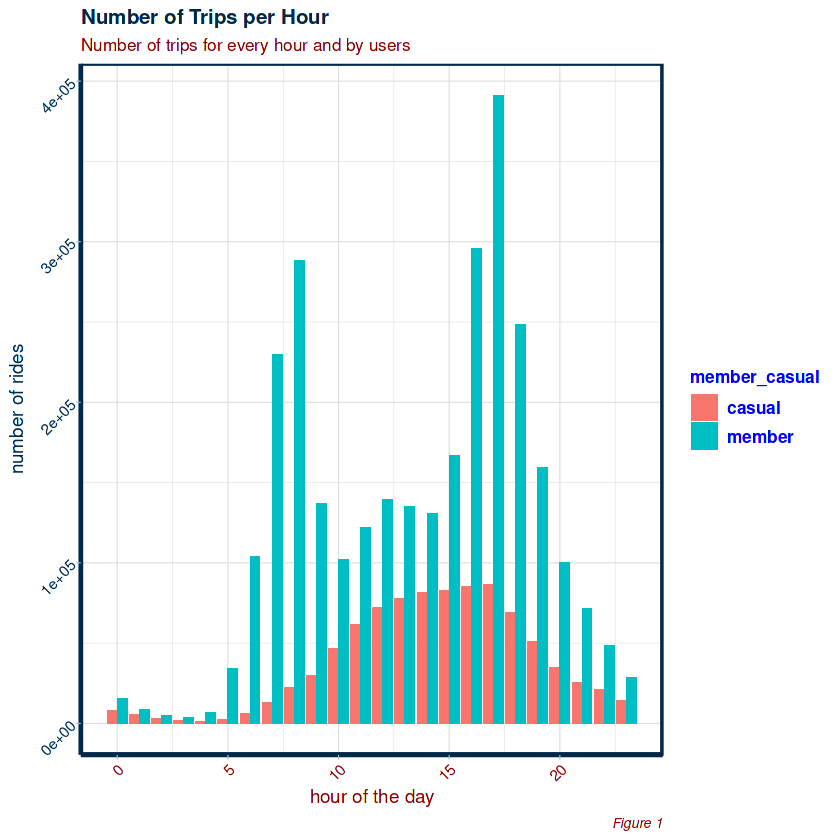

In [20]:
ride_hours %>% 
  ggplot(aes(hour_start, nr_rides, fill = member_casual))+ 
  geom_col(position = "dodge")+ 
  scale_y_continuous()+
  labs(
    title = "Number of Trips per Hour",
    subtitle = "Number of trips for every hour and by users",
    caption = "Figure 1",
    x = "hour of the day",
    y = "number of rides",
  )+
  theme()

#### **Visualising average number of trips by hours**


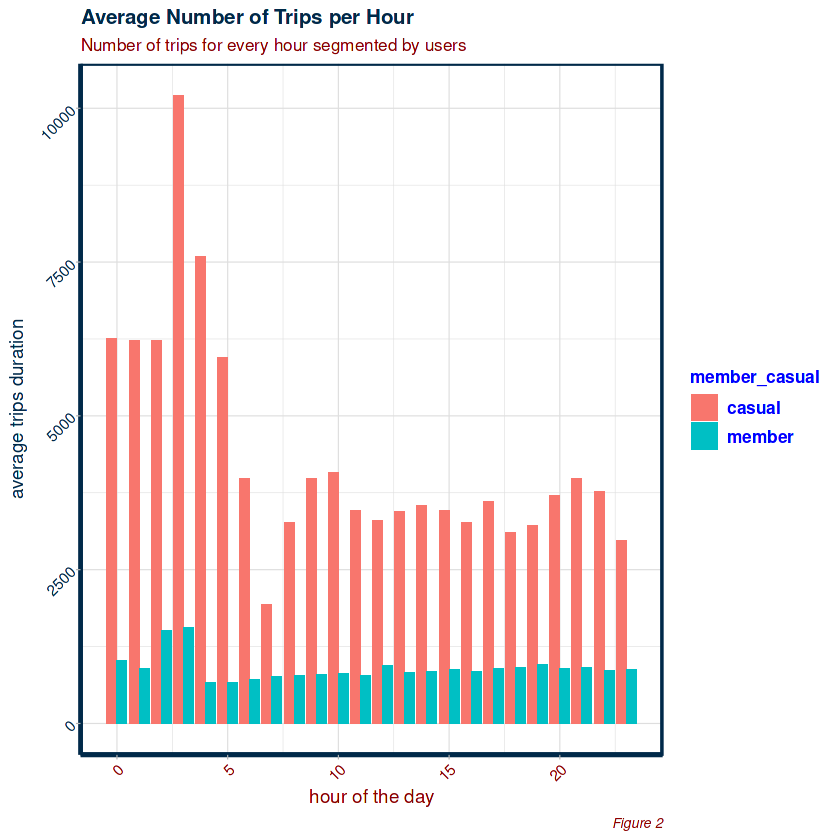

In [21]:
ride_hours %>% 
  ggplot(aes(hour_start, average_trip, fill = member_casual))+ 
  geom_col(position = "dodge")+ 
  scale_y_continuous()+
  labs(
    title = "Average Number of Trips per Hour",
    subtitle = "Number of trips for every hour segmented by users",
    caption = "Figure 2",
    x = "hour of the day",
    y = "average trips duration",
  )+
  theme()


#### **Visualising total_trip time by hours**


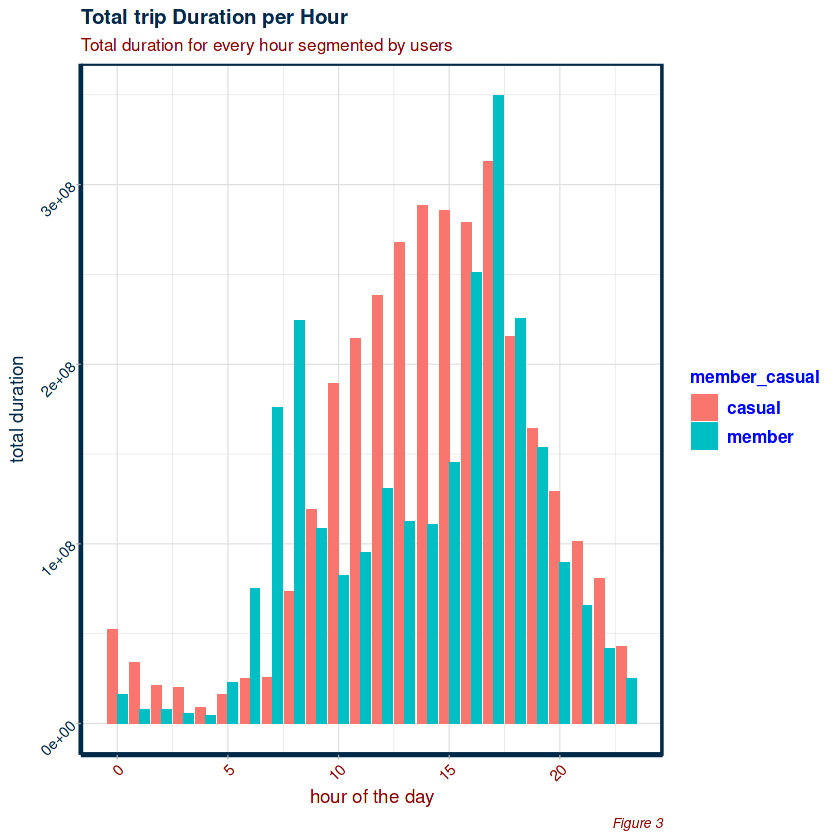

In [22]:
ride_hours %>% 
  ggplot(aes(hour_start, total_trip, fill = member_casual))+ 
  geom_col(show.legend = TRUE, position = "dodge")+ 
  scale_y_continuous()+
  labs(
    title = "Total trip Duration per Hour",
    subtitle = "Total duration for every hour segmented by users",
    caption = "Figure 3",
    x = "hour of the day",
    y = "total duration",
  )+
  theme()

### **Analysis of days of the week**

**Create new sumarisation variables nr_rides_week, average_trip_week, total_duration_week grouped by users type and week.**

In [23]:
ride_week = trips_2 %>% 
  group_by(
    member_casual, weekday
  ) %>% 
  summarise(
    nr_rides_week = n(),
    avg_rides_week = mean(ride_length),
    total_duration_week = sum(ride_length)
  )

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


### **Visualise number of trips by weekday**

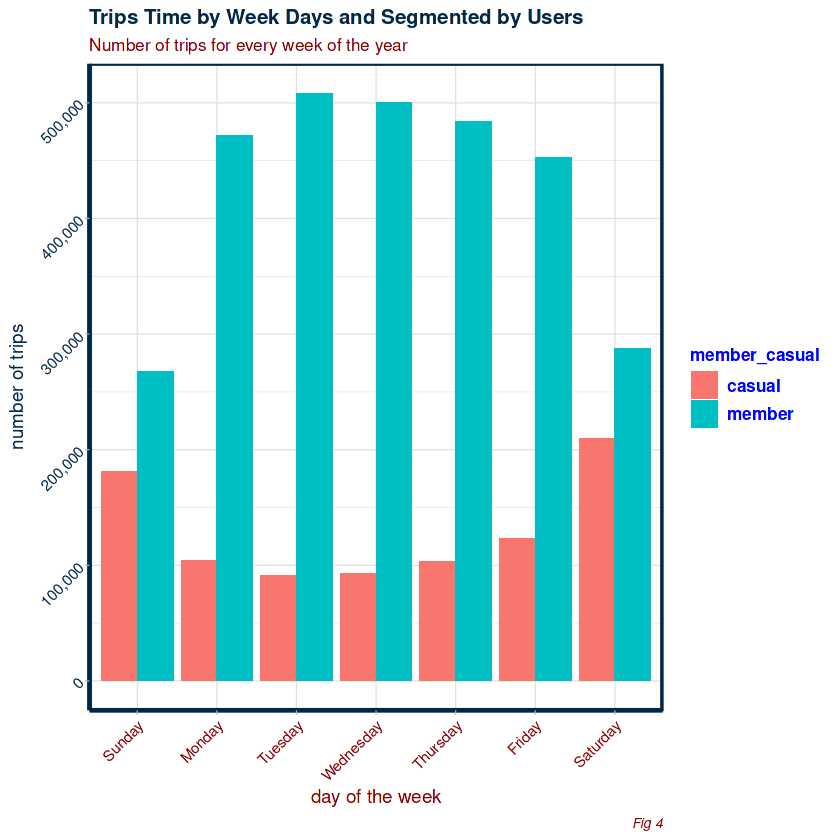

In [24]:
ride_week %>% 
  ggplot(aes(weekday, nr_rides_week, fill = member_casual))+
    geom_col(position = "dodge")+
    scale_y_continuous(labels = comma)+
    labs(
      title = "Trips Time by Week Days and Segmented by Users",
      subtitle = "Number of trips for every week of the year",
      caption = "Fig 4",
      x = "day of the week",
      y = "number of trips"
    )+
    theme()

#### **Visualise average trips time by day of the week**


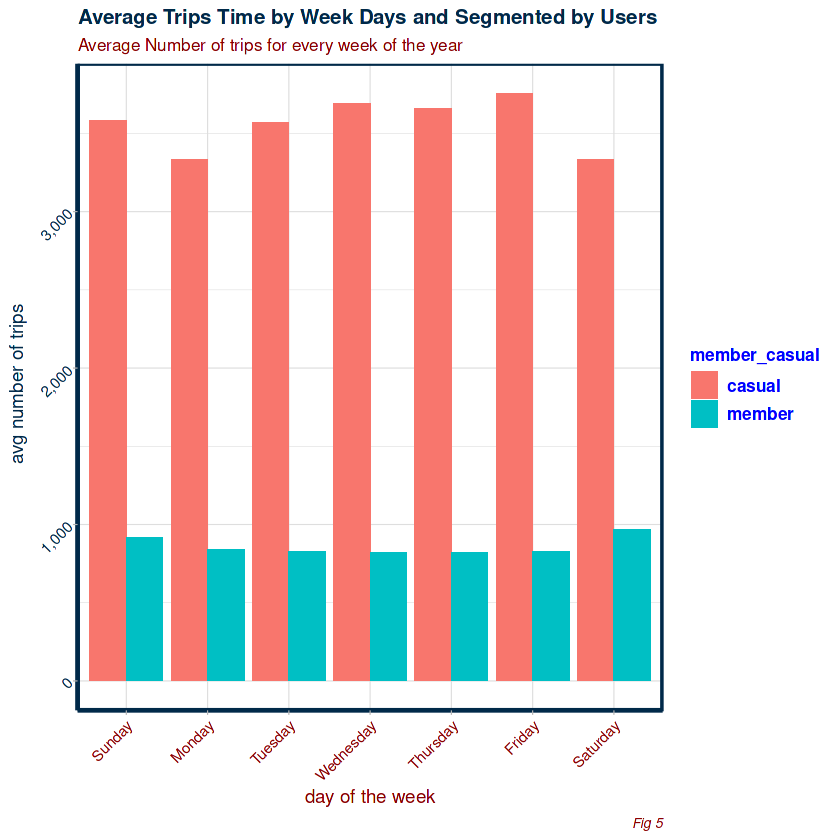

In [25]:
ride_week %>% 
  ggplot(aes(weekday, avg_rides_week, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  labs(
    title = "Average Trips Time by Week Days and Segmented by Users",
    subtitle = "Average Number of trips for every week of the year",
    caption = "Fig 5",
    x = "day of the week",
    y = " avg number of trips"
  )+
  theme()

#### **Visualising total trip time by day of the week**

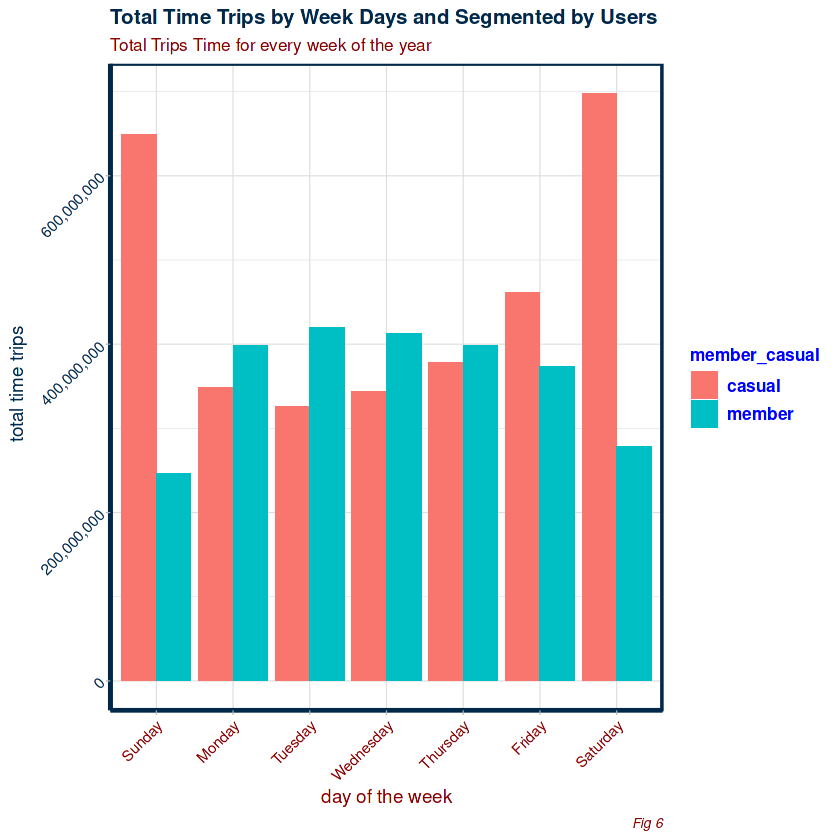

In [26]:
ride_week %>% 
  ggplot(aes(weekday, total_duration_week, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  labs(
    title = "Total Time Trips by Week Days and Segmented by Users",
    subtitle = "Total Trips Time for every week of the year",
    caption = "Fig 6",
    x = "day of the week",
    y = " total time trips"
  )+
  theme()

### **Analysis of trip time by month**
**Descriptive analysis through aggregation**

In [27]:
ride_month = trips_2 %>% 
  group_by(
    member_casual, month
  ) %>% 
  summarise(
    nr_rides_month = n(),
    avg_rides_month = mean(ride_length),
    total_time_month = sum(ride_length)
  )

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


#### **Visualise number trips per month**


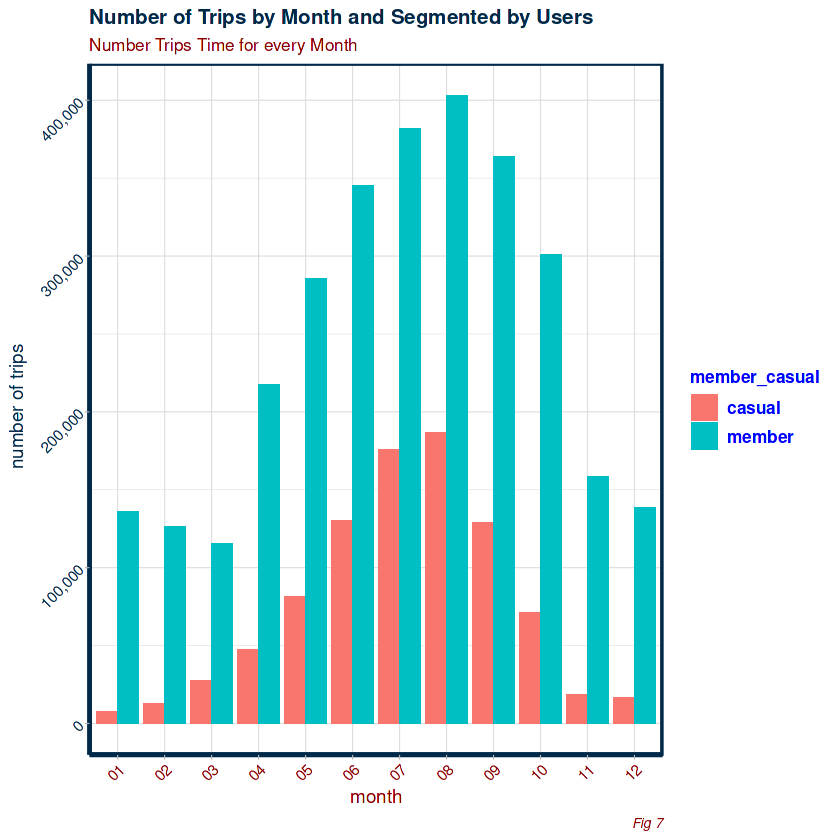

In [28]:
ride_month %>% 
  ggplot(aes(month, nr_rides_month, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  labs(
    title = "Number of Trips by Month and Segmented by Users",
    subtitle = "Number Trips Time for every Month",
    caption = "Fig 7",
    x = "month",
    y = " number of trips"
  )+
  theme()


#### **Visualise Average trip duration per month**


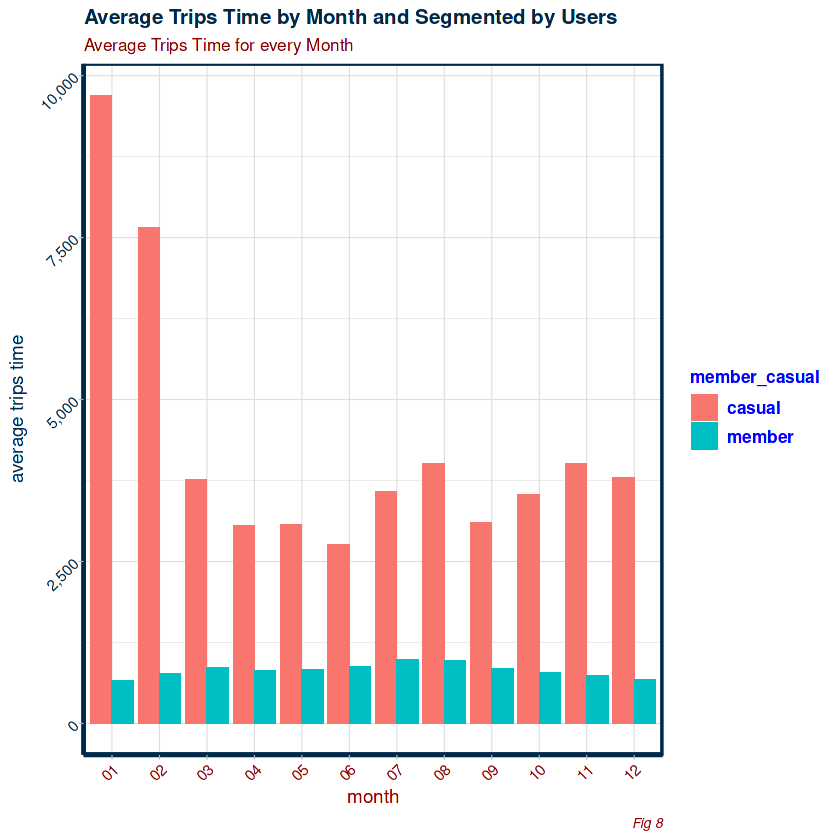

In [29]:
ride_month %>% 
  ggplot(aes(month, avg_rides_month, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  labs(
    title = "Average Trips Time by Month and Segmented by Users",
    subtitle = "Average Trips Time for every Month",
    caption = "Fig 8",
    x = "month",
    y = "average trips time"
  )+
  theme()

#### **Visualise Total trips time by month**

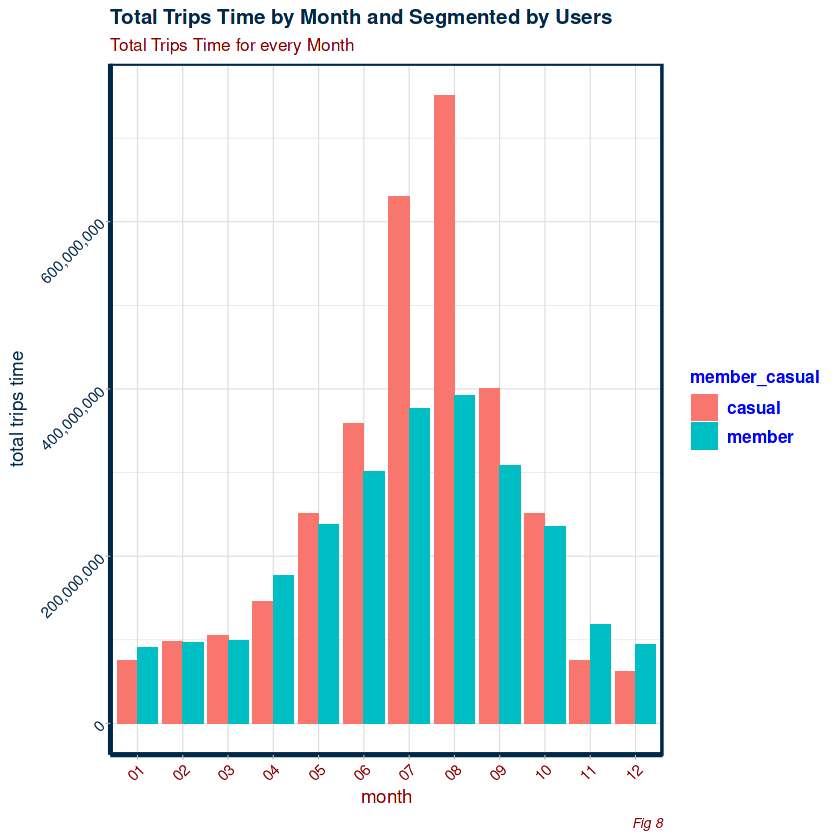

In [30]:
ride_month %>% 
  ggplot(aes(month, total_time_month, fill = member_casual))+
  geom_col(position = "dodge")+
  scale_y_continuous(labels = comma)+
  labs(
    title = "Total Trips Time by Month and Segmented by Users",
    subtitle = "Total Trips Time for every Month",
    caption = "Fig 8",
    x = "month",
    y = "total trips time"
  )+
  theme()

### **Visualising Most popular bike Stations**

#### **Most popular Start Station**

In [31]:
pop_start_station = trips_2 %>% 
  group_by(
    member_casual, start_station_name
  ) %>% 
  summarise(
    nr_rides_start = n()
  ) %>% 
  arrange(-nr_rides_start)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


#### **Visualising Most Popular Start Station**

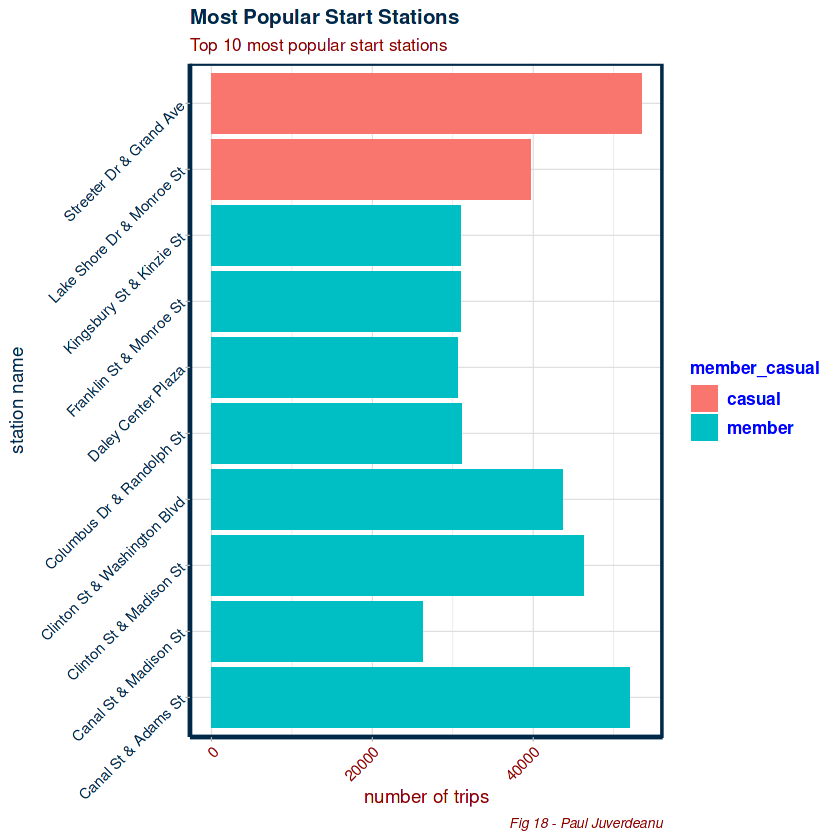

In [32]:
pop_start_station[1:10, ] %>% 
  ggplot(aes(start_station_name, nr_rides_start, fill = member_casual))+
  geom_col(position = "dodge")+
  coord_flip()+
  labs(
    title = "Most Popular Start Stations",
    subtitle = "Top 10 most popular start stations",
    caption = "Fig 18 - Paul Juverdeanu",
    x = "station name",
    y = "number of trips"
  )+
  theme()

#### **Most popular End Station**

In [33]:
pop_end_station = trips_2 %>% 
  group_by(
    member_casual, end_station_name ) %>% 
  summarise(
    nr_rides_end = n()
  ) %>% 
  arrange(-nr_rides_end)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


In [34]:
head(pop_end_station)

member_casual,end_station_name,nr_rides_end
<chr>,<chr>,<int>
casual,Streeter Dr & Grand Ave,67507
member,Canal St & Adams St,48839
member,Clinton St & Washington Blvd,47633
member,Clinton St & Madison St,44285
casual,Lake Shore Dr & Monroe St,31051
member,Daley Center Plaza,30845


#### **Visualising Most Popular End Station**

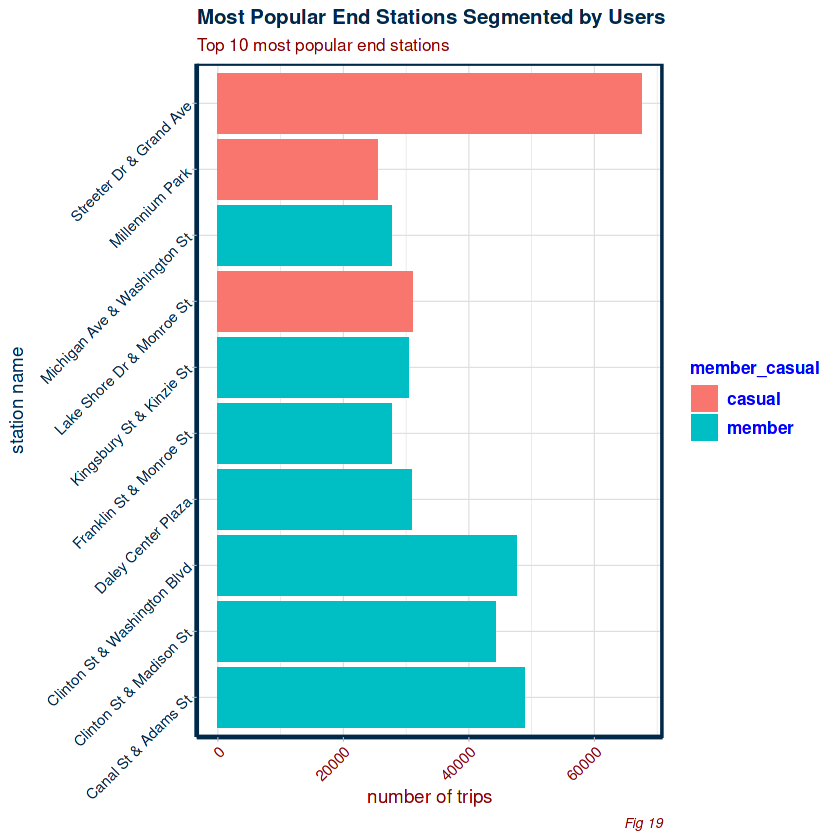

In [35]:
pop_end_station[1:10,] %>% 
  ggplot(aes(end_station_name, nr_rides_end, fill = member_casual))+
  geom_col(position = "dodge")+
  coord_flip()+
  labs(
    title = "Most Popular End Stations Segmented by Users",
    subtitle = "Top 10 most popular end stations",
    caption = "Fig 19",
    x = "station name",
    y = "number of trips"
  )+
  theme()

In [36]:
colnames(trips_2)

[1] "ride_id"            "started_at"         "ended_at"          
 [4] "rideable_type"      "start_station_id"   "start_station_name"
 [7] "end_station_id"     "end_station_name"   "member_casual"     
[10] "hour_start"         "weekday"            "month"             
[13] "day"                "week"               "date"              
[16] "year"               "day_of_week"        "ride_length"

#### **Creating a csv file that we will visualize in Excel, Tableau, or my presentation software**

In [37]:
write.csv(trips_2, file = '/kaggle/working/cyclistic_data.csv')

In [38]:
saveRDS(trips_2, '/kaggle/working/cyclistics_data.rds')

## **Conclusions**
* From our analysis above it can be deduced that users with membership take more rides throughout the week.
* Also, casual users of Cyclistic take much longer rides, that is to say, their trip times are far higher.
* Both Casual and Member Users have there peak use during the 2nd and 3rd quarters of the year, coinciding with the more favorable summer weather.
* We can also see that while users with membership have their peak use during the week, casual users have their peak use in the weekends.
* Looking at the analysis for Popular Start and End stations brings us to conclude that Streeter Dr & Grand Ave is the most popular station, especially for Casual users.


## **Recommendations**
**Following the analysis and finding, we can make the following recommendations:**
*  **Some kind of reward should be put in place for Users with membership who take longer rides, this will encourage casual riders who take longer rides to take up memberships.**
*  **Discounts should be given to Members taking rides in the Summer and weekends, encouraging casual users to register for memberships**
*  **Marketing campaigns should be targeted at the Streeter Dr & Grand Ave Station and relating routes since it has the highest trip volume for casual users.**